In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

# Exploring data

In [99]:
dataPath = 'nlp-getting-started/train.csv'
data = pd.read_csv(dataPath, index_col=0)

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7613 entries, 1 to 10873
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   7552 non-null   object
 1   location  5080 non-null   object
 2   text      7613 non-null   object
 3   target    7613 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 297.4+ KB


### Count

In [101]:
data.count()

keyword     7552
location    5080
text        7613
target      7613
dtype: int64

### Nan

In [102]:
data.isna().sum()

keyword       61
location    2533
text           0
target         0
dtype: int64

In [103]:
dataNonNull = data.dropna()

In [104]:
print(f'{"Columns":20}: {"All":10} {"NonNull":10} {"%NonNull":10} {"Difference"}')
for idx, col in enumerate(data.columns):
    allValue = data.count()[idx]
    nonNullValue = dataNonNull.count()[idx]
    per = nonNullValue*100/allValue
    diff = allValue - nonNullValue
    print(f'{col:20}: {allValue} {nonNullValue:10} {np.round(per):10} {diff:10}')

Columns             : All        NonNull    %NonNull   Difference
keyword             : 7552       5080       67.0       2472
location            : 5080       5080      100.0          0
text                : 7613       5080       67.0       2533
target              : 7613       5080       67.0       2533


In [105]:
data['keyword'].fillna("", inplace=True)
data['location'].fillna("", inplace=True)

## Target

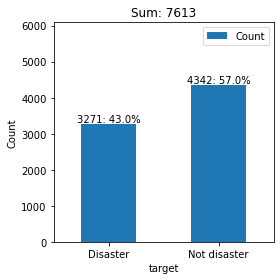

In [106]:
columnName = 'target'

#----------------------
def getCategoricalColumn(value):
    if value == 1: return "Disaster"
    else: return "Not disaster"
    
CategoricalColumn = data[columnName].apply(getCategoricalColumn)
CategoricalColumn.name = 'catTarget'

df = pd.concat([data, CategoricalColumn], axis=1)
#----------------------

groups = []
for group, subset in df.groupby(by=CategoricalColumn.name):
    groups.append({
        CategoricalColumn.name: group,
        'Count': len(subset)
    })

lenData = data[columnName].count()

dataCategoricalQuality = pd.DataFrame(groups)

fig, ax = plt.subplots(figsize=(4, 4))

dataCategoricalQuality.plot.bar(x=CategoricalColumn.name, ax=ax)

for i in range(len(groups)):
    value = str(groups[i]['Count'])+': '+str(np.round(groups[i]['Count']*100/lenData))+'%'
    ax.text(i, groups[i]['Count'], value , horizontalalignment='center', 
            verticalalignment='bottom')

ax.set_ylim(0, lenData - lenData/5)

ax.set_xlabel('target')
ax.set_ylabel('Count')
ax.set_title('Sum: '+ str(lenData) )
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

### target vs keyword

In [ ]:
data['keyword'] = data['keyword'].str.replace('%20', ' ')

In [ ]:
columnNameA = 'target'
columnNameB = 'keyword'

crossTable = pd.crosstab(index=data[columnNameB],
                         columns=data[columnNameA],
                         margins=True)

crossTable.rename(columns={0 : 'Not disaster',1 : 'Disaster',}, inplace=True)

In [ ]:
print('Most frequent Keywords for Disaster')
crossTable.sort_values(by='Disaster', ascending=False).head(10)

In [ ]:
print('Most frequent Keywords for Not disaster')
crossTable.sort_values(by='Not disaster', ascending=False).head(10)

#### target vs keyword length (character)

In [ ]:
data['keywordLengthChar'] = data['keyword'].apply(len)

In [ ]:
columnNameA = 'target'
columnNameB = 'keywordLengthChar'

sns.boxplot(data=data, x=columnNameA, y=columnNameB)


plt.tight_layout()
plt.show()

In [ ]:
columnNameA = 'target'
columnNameB = 'keywordLengthChar'

g = sns.FacetGrid(data, col=columnNameA)
g.map(sns.histplot, columnNameB, bins=30)

plt.tight_layout()
plt.show()

We observe that keyword lengths are longer in Not Disaster than in Disaster

### target vs location

In [ ]:
columnNameA = 'target'
columnNameB = 'location'

crossTable = pd.crosstab(index=data[columnNameB],
                         columns=data[columnNameA],
                         margins=True)

crossTable.rename(columns={0 : 'Not disaster',1 : 'Disaster',}, inplace=True)

In [ ]:
print('Most frequent Locations for Disaster')
crossTable.sort_values(by='Disaster', ascending=False).head(10)

In [ ]:
print('Most frequent Locations for Not disaster')
crossTable.sort_values(by='Not disaster', ascending=False).head(10)

### target vs text

#### Number of character (including space)

In [ ]:
data['textLengthChar'] = data['text'].apply(len)

In [ ]:
columnName = 'textLengthChar'

ax = (data[columnName]).plot.box(figsize=(3, 4))
ax.set_ylabel(columnName)

plt.tight_layout()
plt.show()

In [ ]:
columnNameA = 'target'
columnNameB = 'textLengthChar'

g = sns.FacetGrid(data, col=columnNameA)
g.map(sns.histplot, columnNameB, bins=30)

plt.tight_layout()
plt.show()

We observe that text lengths are longer in Not Disaster than in Disaster

In [ ]:
columnNameA = 'target'
columnNameB = 'textLengthChar'

sns.boxplot(data=data, x=columnNameA, y=columnNameB)

plt.tight_layout()
plt.show()

#### Number of words

In [ ]:
def getWordTextLength(text):
    return len(text.split())
data['textLengthWord'] = data['text'].apply(getWordTextLength)

In [ ]:
columnName = 'textLengthWord'

ax = (data[columnName]).plot.box(figsize=(3, 4))
ax.set_ylabel(columnName)

plt.tight_layout()
plt.show()

In [ ]:
columnNameA = 'target'
columnNameB = 'textLengthWord'

g = sns.FacetGrid(data, col=columnNameA)
g.map(sns.histplot, columnNameB, bins=30)

plt.tight_layout()
plt.show()

We observe that number of words in text are longer in Not Disaster than in Disaster

In [ ]:
columnNameA = 'target'
columnNameB = 'textLengthWord'

sns.boxplot(data=data, x=columnNameA, y=columnNameB)

plt.tight_layout()
plt.show()

#### Link in text

In [ ]:
pattern = r'(https?://\S+)'
data['link']= data["text"].str.extract(pattern)
    
data['containLink'] = data['link'].notna()

In [ ]:
columnNameA = 'target'
columnNameB = 'containLink'

crossTable = pd.crosstab(index=data[columnNameB],
                         columns=data[columnNameA],
                         margins=True)

crossTable.rename(columns={0 : 'Not disaster',1 : 'Disaster',}, inplace=True)
crossTable.rename(index={False : 'No link',True : 'Link',}, inplace=True)

crossTable['Not disaster %'] = crossTable['Not disaster'] * 100 / crossTable['All']
crossTable['Disaster %'] = crossTable['Disaster'] * 100 / crossTable['All']

crossTable

We observe that there are more links in Disaster than Not Disaster.

# Processing data with PyPark

In [3]:
#Create a connection
import pyspark as ps
from pyspark import SparkContext
from pyspark.sql import SparkSession

try:
    sc.stop()
except:
    print('SparkContext is not created!')

sc = SparkContext(master = "local", appName = "App").getOrCreate()
print(sc, sc.version)

spark = SparkSession.builder.getOrCreate()

SparkContext is not created!
<SparkContext master=local appName=App> 3.2.0


## Loading data

In [4]:
spark.catalog.listTables()

[]

### Training set

In [5]:
trainPath = 'nlp-getting-started/train.csv'
trainData = spark.read.format('csv').options(header='true', inferSchema='true').load(trainPath)
trainData.printSchema()

root
 |-- id: string (nullable = true)
 |-- keyword: string (nullable = true)
 |-- location: string (nullable = true)
 |-- text: string (nullable = true)
 |-- target: integer (nullable = true)



In [6]:
trainData.show(5)

+---+-------+--------+--------------------+------+
| id|keyword|location|                text|target|
+---+-------+--------+--------------------+------+
|  1|   null|    null|Our Deeds are the...|     1|
|  4|   null|    null|Forest fire near ...|     1|
|  5|   null|    null|All residents ask...|     1|
|  6|   null|    null|13,000 people rec...|     1|
|  7|   null|    null|Just got sent thi...|     1|
+---+-------+--------+--------------------+------+
only showing top 5 rows



In [7]:
trainData.createOrReplaceTempView('trainData')

### Test set

In [8]:
testPath = 'nlp-getting-started/test.csv'
testData = spark.read.format('csv').options(header='true', inferSchema='true').load(testPath)
testData.printSchema()

root
 |-- id: string (nullable = true)
 |-- keyword: string (nullable = true)
 |-- location: string (nullable = true)
 |-- text: string (nullable = true)



In [9]:
testData.createOrReplaceTempView('testData')

## Preprocessing

### Preprocessing step by step

In [11]:
dataframe = spark.sql("SELECT * FROM trainData WHERE target is not NULL")
dataframe.count()

7176

#### Preprocessing Nan

In [ ]:
dataframe = dataframe.na.fill(value="",subset=["keyword", "location", "text"])

#### Preprocessing text

In [ ]:
import pyspark.sql.functions as F

In [ ]:
textColector = dataframe.collect()
for line in textColector[:5]:
    print(line['text'])

Create column checking if there is a link

In [ ]:
from pyspark.sql.types import IntegerType

pattern = r'(https?://\S+)'

dataframe = dataframe.withColumn("containLink", F.when(F.col("text").rlike(pattern),1).otherwise(0))

Create column without link

In [ ]:
pattern = r'(https?://\S+)'

dataframe = dataframe.withColumn('textNoLink', F.regexp_replace(F.col('text'), pattern, ""))

Tokenizer: list of words and removing special characters

In [ ]:
from pyspark.ml.feature import RegexTokenizer

dataframe = dataframe.drop('wordText')
dataframe = RegexTokenizer(inputCol="textNoLink", outputCol="wordText", pattern="\\W").transform(dataframe)

In [ ]:
from pyspark.ml.feature import StopWordsRemover

locale = sc._jvm.java.util.Locale
locale.setDefault(locale.forLanguageTag("en-US"))

dataframe = dataframe.drop('wordTextNoSW')
dataframe= StopWordsRemover(inputCol="wordText", outputCol="wordTextNoSW").transform(dataframe)

In [ ]:
from pyspark.ml.feature import Word2Vec

dataframe = dataframe.drop('vecText')
word2Vec = Word2Vec(vectorSize=100, minCount=0, inputCol="wordTextNoSW", outputCol="vecText")
dataframe = word2Vec.fit(dataframe).transform(dataframe)

#### Preprocessing keyword and location

In [ ]:
from pyspark.ml import Pipeline 
from pyspark.ml.feature import StringIndexer

# For mulitple columns
dataframe = dataframe.drop('keywordIndex')
dataframe = dataframe.drop('locationIndex')
indexers = [StringIndexer(inputCol=column, outputCol=column+"Index")\
            for column in list(set(["keyword", "location"])) ]

pipeline = Pipeline(stages=indexers)

dataframe = pipeline.fit(dataframe).transform(dataframe)

#### Create several features based on length

In [ ]:
dataframe = dataframe.withColumn('keywordLength', F.length('keyword'))

In [ ]:
dataframe = dataframe.withColumn('textNoLinkLength', F.length('textNoLink'))

#### Feature assembler

In [ ]:
from pyspark.ml.feature import VectorAssembler

dataframe = dataframe.drop('catFeatures')
catAssembler = VectorAssembler(inputCols=["keywordIndex", "locationIndex", 
                                        "keywordLength", "textNoLinkLength",
                                        "containLink"], outputCol="catFeatures")

dataframe = catAssembler.transform(dataframe)

In [ ]:
dataframe = dataframe.drop('catTextFeatures')
catTextAssembler = VectorAssembler(inputCols=["keywordIndex", "locationIndex", 
                                        "keywordLength", "textNoLinkLength",
                                        "containLink", "vecText"], outputCol="catTextFeatures")

dataframe = catTextAssembler.transform(dataframe)

#### Feature normalization

In [ ]:
from pyspark.ml.feature import RobustScaler

dataframe = dataframe.drop('catFeaturesRobustScaler')
catFeatureRobustScaler = RobustScaler(inputCol="catFeatures", outputCol="catFeaturesRobustScaler",
                                      withScaling=True, withCentering=True,
                                      lower=0.25, upper=0.75)

dataframe = catFeatureRobustScaler.fit(dataframe).transform(dataframe)

In [ ]:
dataframe = dataframe.drop('catTextFeaturesRobustScaler')
catTextFeatureRobustScaler = RobustScaler(inputCol="catTextFeatures", outputCol="catTextFeaturesRobustScaler",
                                      withScaling=True, withCentering=True,
                                      lower=0.25, upper=0.75)

dataframe = catTextFeatureRobustScaler.fit(dataframe).transform(dataframe)

### Preprocessing pipeline

In [10]:
from pyspark import keyword_only
from pyspark.ml import Transformer
from pyspark.ml.param.shared import HasInputCol, HasOutputCol
from pyspark.ml import Pipeline 
import pyspark.sql.functions as F
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover, Word2Vec, StringIndexer, VectorAssembler, RobustScaler

In [11]:
class FillNanTransformer(Transformer, HasInputCol):
    @keyword_only
    def __init__(self, inputCol=None):
        super(FillNanTransformer, self).__init__()
        kwargs = self._input_kwargs
        self.setParams(**kwargs)

    @keyword_only
    def setParams(self, inputCol=None):
        kwargs = self._input_kwargs
        return self._set(**kwargs)
    
    def _transform(self, dataset):
        dataset = dataset.na.fill(value="",subset=[self.getInputCol()])
        return dataset
    
class TextNoLinkTransformer(Transformer, HasInputCol, HasOutputCol):
    @keyword_only
    def __init__(self, inputCol=None, outputCol=None):
        super(TextNoLinkTransformer, self).__init__()
        kwargs = self._input_kwargs
        self.setParams(**kwargs)

    @keyword_only
    def setParams(self, inputCol=None, outputCol=None):
        kwargs = self._input_kwargs
        return self._set(**kwargs)
    
    def _transform(self, dataset):
        pattern = r'(https?://\S+)'
        dataset = dataset.withColumn(self.getOutputCol(), F.regexp_replace(F.col(self.getInputCol()), pattern, ""))
        return dataset
    
class ContainLinkTransformer(Transformer, HasInputCol, HasOutputCol):
    @keyword_only
    def __init__(self, inputCol=None, outputCol=None):
        super(ContainLinkTransformer, self).__init__()
        kwargs = self._input_kwargs
        self.setParams(**kwargs)

    @keyword_only
    def setParams(self, inputCol=None, outputCol=None):
        kwargs = self._input_kwargs
        return self._set(**kwargs)
    
    def _transform(self, dataset):
        pattern = r'(https?://\S+)'
        dataset = dataset.withColumn(self.getOutputCol(), F.when(F.col(self.getInputCol()).rlike(pattern),1).otherwise(0))
        return dataset
    
class KeywordLengthTransformer(Transformer, HasInputCol, HasOutputCol):
    @keyword_only
    def __init__(self, inputCol=None, outputCol=None):
        super(KeywordLengthTransformer, self).__init__()
        kwargs = self._input_kwargs
        self.setParams(**kwargs)

    @keyword_only
    def setParams(self, inputCol=None, outputCol=None):
        kwargs = self._input_kwargs
        return self._set(**kwargs)
    
    def _transform(self, dataset):
        dataset = dataset.withColumn(self.getOutputCol(), F.length(self.getInputCol()))
        return dataset
    
class TextNoLinkLengthTransformer(Transformer, HasInputCol, HasOutputCol):
    @keyword_only
    def __init__(self, inputCol=None, outputCol=None):
        super(TextNoLinkLengthTransformer, self).__init__()
        kwargs = self._input_kwargs
        self.setParams(**kwargs)

    @keyword_only
    def setParams(self, inputCol=None, outputCol=None):
        kwargs = self._input_kwargs
        return self._set(**kwargs)
    
    def _transform(self, dataset):
        dataset = dataset.withColumn(self.getOutputCol(), F.length(self.getInputCol()))
        return dataset

In [12]:
textFillNanTransformer = FillNanTransformer(inputCol="text")
keywordFillNanTransformer = FillNanTransformer(inputCol="keyword")
locationFillNanTransformer = FillNanTransformer(inputCol="location")

containLinkTransformer = ContainLinkTransformer(inputCol="text", outputCol="containLink")
textNoLinkTransformer = TextNoLinkTransformer(inputCol="text", outputCol="textNoLink")

regexTokenizer = RegexTokenizer(inputCol="textNoLink", outputCol="wordText", pattern="\\W")
stopWordsRemover = StopWordsRemover(inputCol="wordText", outputCol="wordTextNoSW")
word2Vec = Word2Vec(vectorSize=100, minCount=0, inputCol="wordTextNoSW", outputCol="vecText")
keywordIndexer = StringIndexer(inputCol="keyword", outputCol="keywordIndex")
locationIndexer = StringIndexer(inputCol="location", outputCol="locationIndex")

keywordLengthTransformer = KeywordLengthTransformer(inputCol="keyword", outputCol="keywordLength")
textNoLinkLengthTransformer = TextNoLinkLengthTransformer(inputCol="textNoLink", outputCol="textNoLinkLength")

catAssembler = VectorAssembler(inputCols=["keywordIndex", "locationIndex", 
                                        "keywordLength", "textNoLinkLength",
                                        "containLink"], outputCol="catFeatures")

catTextAssembler = VectorAssembler(inputCols=["keywordIndex", "locationIndex", 
                                        "keywordLength", "textNoLinkLength",
                                        "containLink", "vecText"], outputCol="catTextFeatures")

catFeatureRobustScaler = RobustScaler(inputCol="catFeatures", outputCol="catFeaturesRobustScaler",
                                      withScaling=True, withCentering=True,
                                      lower=0.25, upper=0.75)

catTextFeatureRobustScaler = RobustScaler(inputCol="catTextFeatures", outputCol="catTextFeaturesRobustScaler",
                                      withScaling=True, withCentering=True,
                                      lower=0.25, upper=0.75)

In [13]:
preprocessingPipeline = Pipeline(stages=[textFillNanTransformer,
                                keywordFillNanTransformer,
                                locationFillNanTransformer,
                                containLinkTransformer,
                                textNoLinkTransformer,
                                regexTokenizer,
                                stopWordsRemover,
                                word2Vec,
                                keywordIndexer,
                                locationIndexer,
                                keywordLengthTransformer,
                                textNoLinkLengthTransformer,
                                catAssembler,
                                catTextAssembler,
                                catFeatureRobustScaler,
                                catTextFeatureRobustScaler])

## Training

In [14]:
trainingData = spark.sql("SELECT * FROM trainData WHERE target is not NULL")  
testData = spark.sql("SELECT * FROM testData")

In [15]:
trainingDataPreprocessed = preprocessingPipeline.fit(trainingData).transform(trainingData)
testDataPreprocessed = preprocessingPipeline.fit(trainingData).transform(testData)

In [16]:
trainSet, validSet = trainingDataPreprocessed.randomSplit([0.9, 0.1], seed=12345)

We observe predictions of validation set based on only several features created with/without "text" feature

In [17]:
featuresCol = "catTextFeaturesRobustScaler"
labelCol = "target"

### Several algorithms

In [24]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GBTClassifier, MultilayerPerceptronClassifier, LinearSVC

evaluator = MulticlassClassificationEvaluator(labelCol=labelCol, predictionCol="prediction", metricName="f1")

algorithmList = {"LR":   LogisticRegression(featuresCol=featuresCol, labelCol=labelCol,regParam = 0.1, maxIter=100),
                 "DTC":  DecisionTreeClassifier(featuresCol=featuresCol, labelCol=labelCol, maxDepth=7),
                 "RFC":  RandomForestClassifier(featuresCol=featuresCol, labelCol=labelCol, maxDepth=16, numTrees=15),
                 "GBTC": GBTClassifier(featuresCol=featuresCol, labelCol=labelCol, maxIter=20, maxDepth=16, stepSize=0.001),
                 #"MPC":  MultilayerPerceptronClassifier(featuresCol=featuresCol, labelCol=labelCol, maxIter=2, layers=[5, 5, 2]),
                 "LSVC": LinearSVC(featuresCol=featuresCol, labelCol=labelCol, maxIter=100, regParam=0.1)
                }

In [37]:
for name, algorithm in zip(algorithmList.keys(), algorithmList.values()):
    model = algorithm.fit(trainSet)
    prediction = model.transform(validSet)
    score = evaluator.evaluate(prediction)
    print(name, score)

LR 0.7315598554976371
DTC 0.7242219200183468
RFC 0.749133848105099
GBTC 0.6871448738769754
LSVC 0.7132574909198734


In [19]:
algorithmName = "GBTC"
algorithm = algorithmList[algorithmName]
prediction = algorithm.fit(trainSet).transform(validSet)

0.7272439049533529


### Plot Score

In [84]:
trueLabel = np.array(prediction.select('target').collect()).squeeze()
predLabel = np.array(prediction.select('prediction').collect()).squeeze()
predProb = np.array(prediction.select('probability').collect()).squeeze()

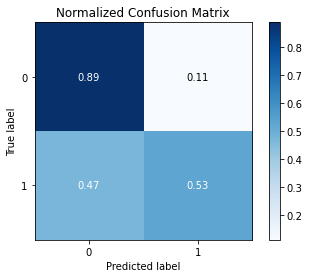

In [92]:
import scikitplot as skplt
import matplotlib.pylab as plt

skplt.metrics.plot_confusion_matrix(trueLabel, predLabel, normalize=True)
plt.show()

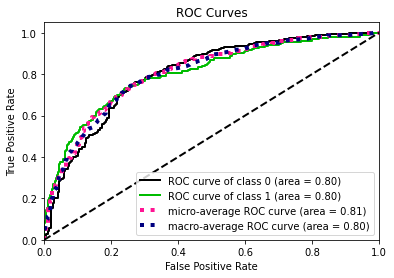

In [97]:
skplt.metrics.plot_roc(trueLabel, predProb)
plt.show()